In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import random
import os
import sklearn.cluster 

import msg_passing
import utils
import run
import display
import parse_data

In [3]:
def view_history(fdir, f_prefix):
    hist, _ = msg_passing.load_history(fdir + f_prefix + ".pkl") 
    return hist.keys()

def plot_run(fdir, f_prefix, target):
    print("Plotting run for", fdir + f_prefix)
    g = msg_passing.load_graph_graphml(fdir + f_prefix + ".graphml")
    hist, diagnostic_hist = msg_passing.load_history(fdir + f_prefix + ".pkl")
    display.plot_diagnostic(diagnostic_hist)
    display.plot_history(hist, target=target)


dict_keys(['second amendment', 'supreme court', 'democrats', 'bruen', 'joe biden', 'texas', 'nra', 'new york', 'a ban on assault weapons', 'biden', 'republican', 'republicans', 'house', 'gun owners of america', 'second amendment foundation', 'democratic', 'gop', 'everytown for gun safety', 'national rifle association', 'california'])
Plotting run for output/test/gun_regulations_network_random_walks_lr_10-3_50K_dc_095_pl_10_bs_10


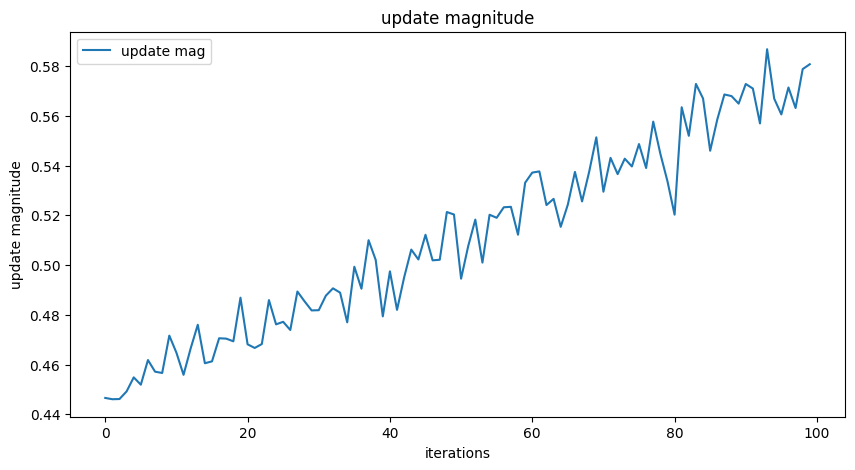

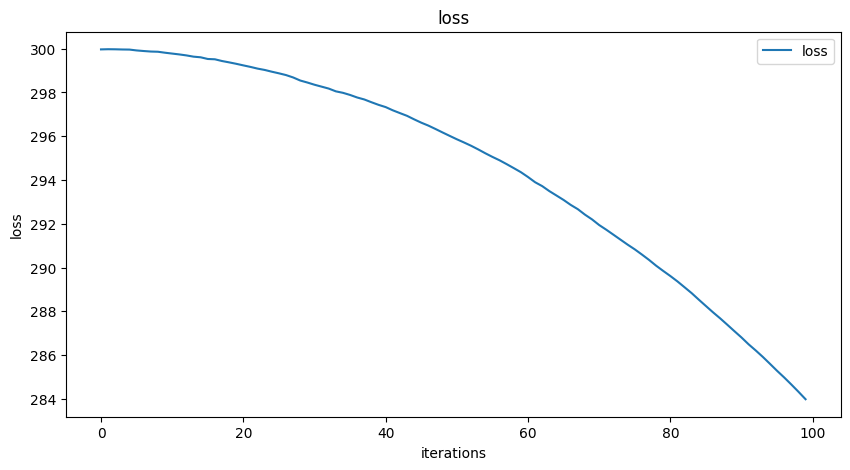

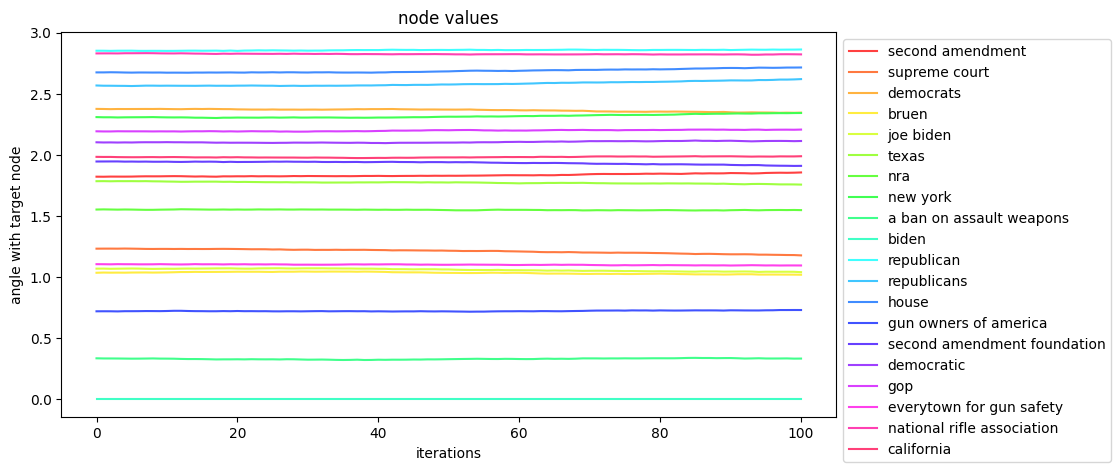

In [6]:
infiles = [
    "global_warming_network",
    "gun_regulations_network",
    "immigration_network",
    "inflation_network",
    "roe_v_wade_network",
    "trump_impeachment_network",
    "ukraine_war_network",
    "vaccine_hesitancy_network",
    "combined"
]
outdir = "output/test/"
out_suffix = "_random_walks_lr_10-3_50K_dc_095_pl_10_bs_10"
net = infiles[1] 
print(view_history(outdir, net + out_suffix))
plot_run(outdir, net + out_suffix, "biden")

In [ ]:
networks = [
    "global_warming", 
    "gun_regulations",
    "immigration",
    "inflation",
    "roe_v_wade",
    "trump_impeachment",
    "ukraine_war",
    "vaccine_hesitancy",
]
prefix = "output/Incremental_Datasets/" 
prefix = "output/" 
network = networks[6]
suffix = "_v3_random_walk_batch_10_path_10_50K_lr_3_dim_3"


fg1 = prefix + network + suffix + ".graphml" 
fh1 = prefix + network + suffix + ".pkl"

#fg = "output/gun_regulations_v2_raw_answer_dedup_ques_50K_lr_3_dim_10.graphml"
#fh = "output/gun_regulations_v2_raw_answer_dedup_ques_50K_lr_3_dim_10.pkl"
#fg = "output/combined_v2_general_msg_passing_batch_10_path_10_100K_lr_3_dim_3.graphml"
#fh = "output/combined_v2_general_msg_passing_batch_10_path_10_100K_lr_3_dim_3.pkl"


#fg = "output/gun_regulations_v2_general_msg_passing_batch_10_path_10_500K_lr_3_dim_3.graphml" 
#fh = "output/gun_regulations_v2_general_msg_passing_batch_10_path_10_500K_lr_3_dim_3.pkl"

fg = "output/combined_v3_random_walk_batch_10_path_10_50K_lr_3_dim_3.graphml"
fh = "output/combined_v3_random_walk_batch_10_path_10_50K_lr_3_dim_3.pkl"

#hist, diagnostic_hist = msg_passing.load_history(fh) 
g = msg_passing.load_graph_graphml(fg) 
pg, aux = msg_passing.prune_graph(g)

g1 = msg_passing.load_graph_graphml(fg1) 
pg1, aux1 = msg_passing.prune_graph(g1)
#display.plot_diagnostic(diagnostic_hist) 
top_nodes = [u[0] for u in utils.node_degrees(pg1)]
real_top_nodes = []
i = 0
added = 0
while(added < 20):
    if(top_nodes[i] in pg.nodes()):
        real_top_nodes.append(top_nodes[i]) 
        added += 1
    i += 1
#pg = msg_passing.initialize_node_values(pg, size=3)
#fig = display.node_confusion_matrix(pg, real_top_nodes, title=network) 
fig = display.node_confusion_matrix(pg1, real_top_nodes, title="single network")
#fig = display.confusion_matrix(pg, 20, title=network)
fig.write_html("images/" + network + suffix + ".html")
fig = display.cos_dist_histogram(pg, title=network)
print("final loss:", msg_passing.loss_cos_dist(pg))